# 3. Differentiation

## 3.1 Delta Method

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# plot one graph
def plot_graph(x, y, xlimits=None, ylimits=None):
  fig, ax = plt.subplots()
  plt.axvline(x=0, color='lightgray')
  plt.axhline(y=0, color='lightgray')
  if (xlimits == None and ylimits == None):
    plt.xlim(np.min(x), np.max(x))
    plt.ylim(np.min(y), np.max(y))
  if (xlimits):
    plt.xlim(xlimits[0], xlimits[1])
  if (ylimits):
    plt.ylim(ylimits[0], ylimits[1])
  _ = ax.plot(x, y)


# plot multiple graphs
def plot_graphs(graphs):

  fig, ax = plt.subplots()

  for graph in graphs:
    ax.plot(graph[0], graph[1])

  plt.axvline(x=0, color='lightgray')
  plt.axhline(y=0, color='lightgray')


def plot_points(points, color=None, size=None, annotate='on'):
  for point in points: 
    plt.scatter(point[0], point[1], c=color, s=size)
    if (annotate == 'on'):
      plt.annotate(str(point), xy=(point[0]+0.25, point[1]+0.25), ha='center', va='top', c='black', fontsize=13)
    elif (annotate == 'off'):
      pass

### 1. Quadratic equation

$y = x^2 + 2x + 2$:

In [ ]:
def func(x):
    y = x**2 + 2*x + 2
    return y

In [ ]:
x = np.linspace(-10, 10, 10000)
y = func(x)

### 2. Point 1

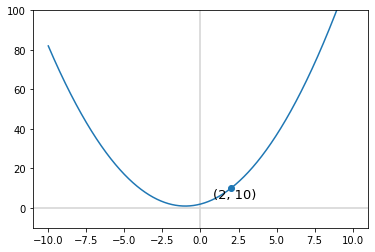

In [ ]:
plot_graph(x, y, ylimits=(-10, 100))
plot_point([(2, func(2))]) # new

### 2. Point2

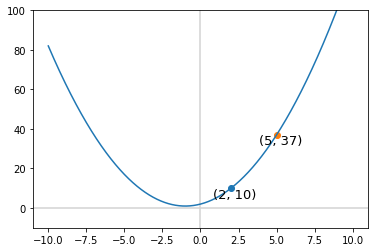

In [ ]:
p = (2, func(2))
q = (5, func(5))

plot_graph(x, y, ylimits=(-10, 100))
plot_point([p])
plot_point([q])

### 3. 2 points and a slope

To find the slope $m$ between points $P$ and $Q$:  

$$m = \frac{\text{change in }y}{\text{change in }x} = \frac{\Delta y}{\Delta x} = \frac{y_2 - y_1}{x_2 - x_1} = \frac{37-10}{5-2} = \frac{27}{3} = 9$$

In [ ]:
m = (37-10)/(5-2)
m

9.0

To plot the line that passes through $P$ and $Q$, we can rearrange the equation of a line $y = mx + b$ to solve for $b$:$$b = y - mx$$

In [ ]:
b = 37 - m*5
b 

-8.0

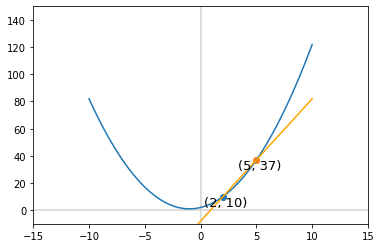

In [ ]:
line_y = m*x + b

plot_graph(x, y, xlimits=(-15, 15), ylimits=(-10, 150))
plot_point([p, q])
plt.plot(x, line_y, c='orange')

### 4. Bring two points closer

The closer $Q$ becomes to $P$, the closer the slope $m$ comes to being the true tangent of the point $P$. Let's demonstrate this with another point $Q$ at $x = 2.1$.

Previously, our $\Delta x$ between $Q$ and $P$ was equal to 3. Now it is much smaller:$$\Delta x = x_2 - x_1 = 2.1 - 2 = 0.1 $$

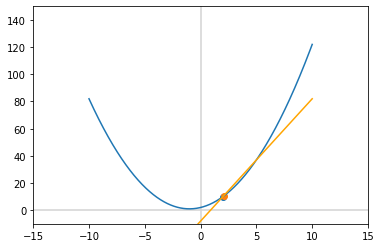

In [ ]:
p1 = (2, 10)
q1 = (2.1, 10.61)

plot_graph(x, y, xlimits=(-15, 15), ylimits=(-10, 150))
plot_point([p1, q1], annotate='off')
plt.plot(x, line_y, c='orange')

In [ ]:
m = (10.61 - 10)/(2.1 - 2)
m

6.099999999999989

In [ ]:
b = 10.61 - m*2.1
b

-2.199999999999978

In [ ]:
line_y = m * x + b
line_y

array([-63.2       , -63.18779878, -63.17559756, ...,  58.77559756,
        58.78779878,  58.8       ])

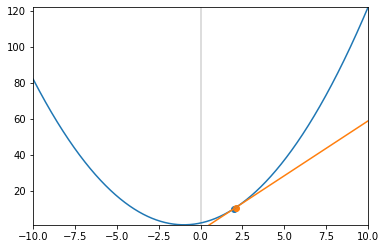

In [ ]:
plot_graph(x, y)
plot_point([(2, 10), (2.1, 10.61)], annotate='off')
plt.plot(x, line_y)


The closer $Q$ becomes to $P$ (i.e., $\Delta x$ approaches 0), the clearer it becomes that the slope $m$ at point $P$ = (2, 10) is equal to 6.

Let's make $\Delta x$ extremely small, 0.000001, to illustrate this:

In [ ]:
delta_x = 0.000001
delta_x

1e-06

In [ ]:
x1 = 2
y1 = 10

Rearranging $\Delta x = x_2 - x_1$, we can calculate $x_2$ for our point $Q$, which is now extremely close to $P$:

In [ ]:
x2 = x1 + delta_x
x2

2.000001

$y_2$ for our point $Q$ can be obtained with the usual function $f(x)$:$$y_2 = f(x_2)$$

In [ ]:
y2 = func(x2)
y2

10.000006000001001


To find the slope $m$, we continue to use$$m = \frac{\Delta y}{\Delta x} = \frac{y_2 - y_1}{x_2 - x_1}$$

In [ ]:
m = (y2 - y1)/(x2 - x1)
m

6.000001000088901

### Exercise
Boom! Using the delta method, we've shown that at point $P$, the slope of the curve is 6.

Exercise: Using the delta method, find the slope of the tangent where $x = -1$.

In [ ]:
x3 = -1
y3 = func(x3)

x4 = x3 + delta_x
y4 = func(x4)

(x3, y3), (x4, y4)

((-1, 1), (-0.999999, 1.000000000001))

In [ ]:
m4 = (y4-y3)/(x4-x3)
m4

1.0000889005535828e-06

In [ ]:
b3 = m4*x3 + y3
b4 = m4*x4 + y4

b3, b4

(0.9999989999110994, 0.9999989999130996)

In [ ]:
line_y4 = m4 * x + b4

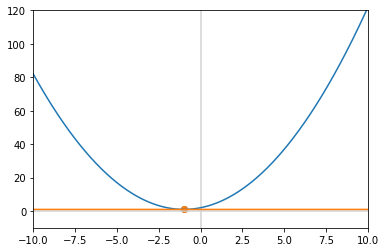

In [ ]:
plot_graph(x, y, xlimits=(-10, 10), ylimits=(-10, 120))
plot_point([(x3, y3), (x4, y4)], annotate='off')
plt.plot(x, line_y4)

## 3.2 The Most Common Representation


As $Q$ becomes infinitely close to $P$:

- $x_2$ - $x_1$ approaches 0  
- In other words, $\Delta x$ approaches 0  
- Notation: $\Delta x \to 0$  
Using the delta method, we've derived the definition of differentiation from first principles. The derivative of $y$ (denoted $dy$) with respect to $x$ (denoted $dx$) can be represented as:$$\frac{dy}{dx} = \lim_{\Delta x \to 0} \frac{\Delta y}{\Delta x}$$

<br />

Expanding $\Delta y$ out to $y_2 - y_1$:$$\frac{dy}{dx} = \lim_{\Delta x \to 0} \frac{y_2 - y_1}{\Delta x}$$

<br />

Finally, replacing $y_1$ with $f(x)$ and replacing $y_2$ with $f(x + \Delta x)$, we obtain a common representation of differentiation:$$\frac{dy}{dx} = \lim_{\Delta x \to 0} \frac{f(x + \Delta x) - f(x)}{\Delta x}$$

<br />

Let's observe the differentiation equation in action:

In [ ]:
def diff_demo(function, x, delta):
 return (function(x + delta) - function(x)) / delta

deltas = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]

In [ ]:
for delta in deltas: 
  print(diff_demo(func, 2, delta))

7.0
6.099999999999994
6.009999999999849
6.000999999999479
6.000100000012054
6.000009999951316
6.000001000927568


In [ ]:
for delta in deltas:
  print(diff_demo(func, -1, delta))

1.0
0.10000000000000009
0.009999999999998899
0.001000000000139778
9.99999993922529e-05
1.000000082740371e-05
1.000088900582341e-06



## 3.3 Derivative Notation

differentiation operator: $$\frac{\delta}{\delta x}=D$$

<br />

first derivative of $y$ with respect to $x$: $$\dot{y} = y' = f'(x) = \frac{\delta y}{\delta x} = \frac{\delta}{\delta x}f(x) = Df(x)$$

- y prime (Newton's favourite)
- f prime


<br />

second derivative of $y$ with respect to $x$: $$\ddot{y} = y'' = f''(x) = f'(f'(x))$$

## 3.4 Derivative of Constants

Assuming $c$ is constant: $$\frac{\delta}{\delta x}c =0$$  
- c = constant
- The derivative of a constant will always come out as 0.

The intutition here is that: a constant has no variation so it's slope is always going to be nothing. $$\frac{\delta}{\delta x}25 = 0$$
- If there is no variation in the constant, there is nothing to differentiate. 

## 3.5 Power Rule

$$\frac{\delta}{\delta x}x^n = nx^{n-1}$$

$$\frac{\delta}{\delta x}x^4 = 4x^{4-1} = 4x^3$$


## 3.6 Constant Product Rule


$$\frac{\delta}{\delta x}(cy) = c\frac{\delta}{\delta x}(y) = c\frac{\delta y}{\delta x}$$

$$\frac{\delta}{\delta x}x^4 = 4x^{4-1} = 4x^3$$

<br />

Example)

$$y=x^4$$

$$\frac{\delta y}{\delta x} = 4x^3$$
$$\frac{\delta}{\delta x}(2y) = 2\frac{\delta y}{\delta x} = 2(4x^3) = 8x^3$$

### Constant Product Rule Simplified
Treat derivative separately from whatever constant it has.

$$\frac{\delta}{\delta x} = 2(4x^3) = 8x^3$$

## 3.7 Sum Rule

The sum rule allows us to take two separate terms and calculate the derivative on them separately.   

<br/>

$$\frac{\delta (y+w)}{\delta x} = \frac{\delta y}{\delta x} + \frac{\delta w}{\delta x}$$

Example) &emsp; $y=x^4$, &emsp;  $w=x^9$

$$= \frac{\delta}{\delta x}(x^4) + \frac{\delta}{\delta x}(x^9)$$

<br/>

$$= 4x^3 + 9x^8$$

## 3.8 Exercises

1. Differentiate &emsp; $y = -5x^3$
2. Differentiate &emsp; $2x^2 + 2x + 2$
3. Differentiate &emsp; $10x^5 - 6x^3 - x - 1$
4. Use paper and pencil to find the slope of $y = x^2 + 2x + 2$ where $x=2$ and, separately, find the slope where $x=-1$.


1. $-5(3x^2) = -15x^2$



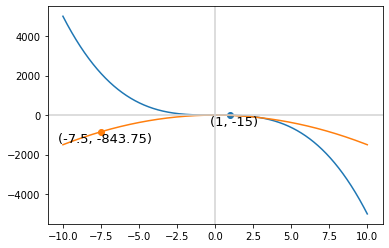

In [ ]:
def func1(x):
  y = -5 * x**3
  return y

def derivative1(x):
  y = -5 * 3 * x**2
  return y

y1 = func1(x)
y1_der = derivative1(x)

p11 = (1, derivative1(1))
q11 = (-7.5, derivative1(-7.5))

plot_graphs([(x, y1), (x, y1_der)])
plot_points([p11, q11])

2. $2(2x') + 2(1x^0) + 0 = 4x + 2$ &emsp; Sum rule in action.


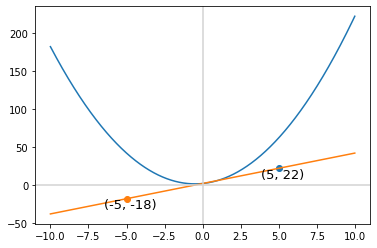

In [ ]:
def func2(x):
  y = 2*x**2 + 2*x + 2
  return y

def derivative2(x):
  y = 4*x + 2
  return y

y2 = func2(x)
y2_der = derivative2(x)

p22 = (5, derivative2(5))
q22 = (-5, derivative2(-5))

plot_graphs([(x, y2), (x, y2_der)])
plot_points([p22, q22])

3. $10x^5-6x^3-x-1 = 50x^4-18x^2-1$

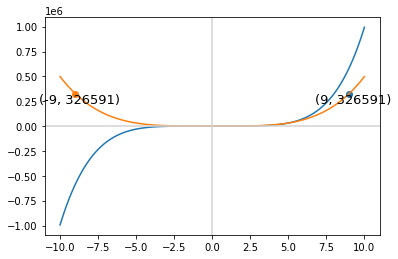

In [ ]:
def func3(x):
  y = 10 * x**5 - 6*x**3 - x - 1
  return y

def derivative3(x):
  y = 50*x**4 - 18 * x**2 - 1
  return y

x = np.linspace(-10, 10, 10000)
y3 = func3(x)
y3_der = derivative3(x)

p33 = (9, derivative3(9))
q33 = (-9, derivative3(-9))

plot_graphs([(x, y3), (x, y3_der)])
plot_points([p33, q33])

4. Derivative = $2x + 2$ &emsp; 

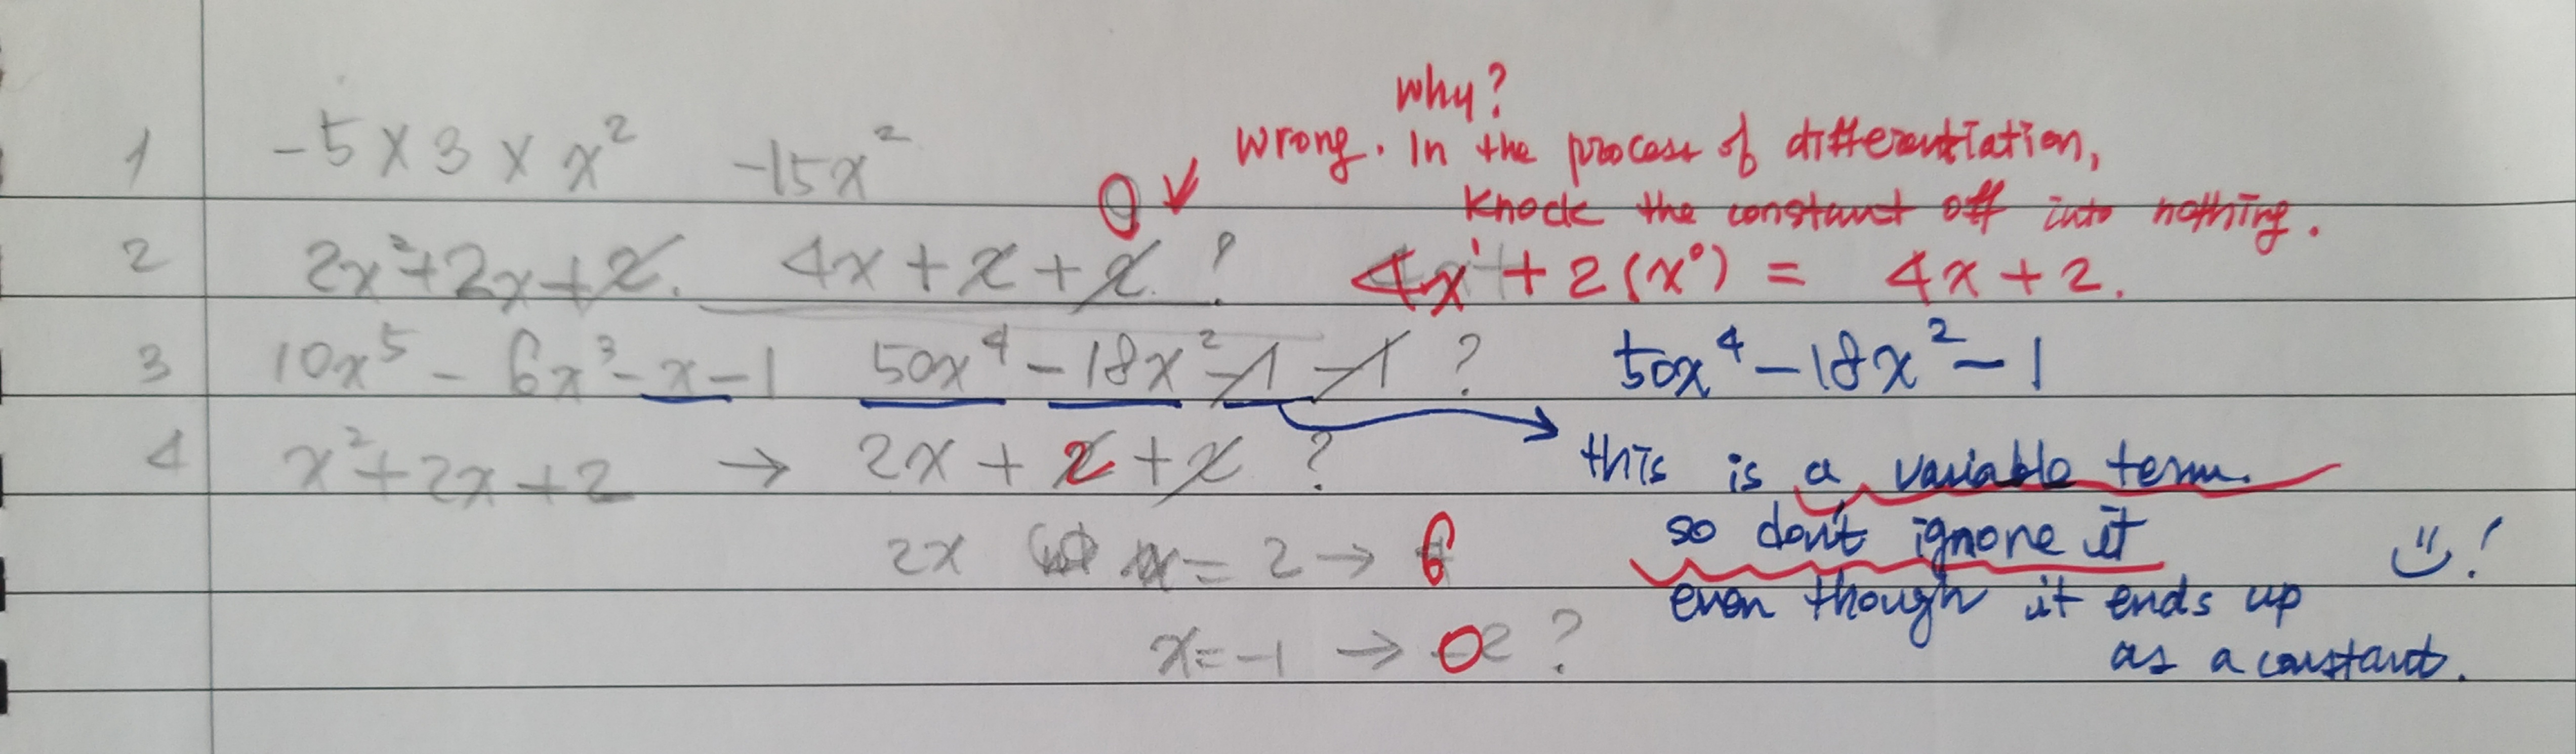


 - $2(4) + 2 = 4 \text{ where } x=2$
 - $2(-1) +2 = 0 \text{ where } x=-1$

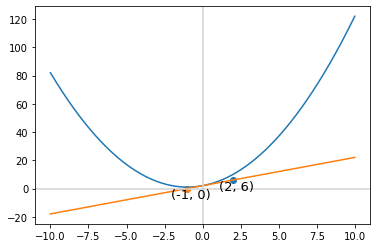

In [ ]:
def func4(x):
  y = x**2 + 2 * x + 2
  return y

x1 = np.linspace(-10, 10, 10000)
y1 = func(x)

def derivative4(x):
  return 2 * x + 2

p1 = (2, derivative4(2))
q1 = (-1, derivative4(-1))

y4 = func4(x)
y4_der = derivative4(x)

plot_graphs([(x, y4), (x, y4_der)])
plot_points([p1, q1])